In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
#move to working directory
%cd '/content/drive/MyDrive/Capstone Project'

/content/drive/MyDrive/Capstone Project


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [ ]:
# Mengatur ukuran gambar dan kategori
IMG_SIZE = 128
CATEGORIES = ['katarak', 'diabetic_retinopathy', 'glaucoma', 'normal', 'mata_belekan', 'mata_iritasi', 'mata_merah']
DATASET_PATH = '/content/drive/MyDrive/Capstone Project/dataset'

In [ ]:
# Fungsi untuk memuat data
def load_data(dataset_path):
    images = []
    labels = []
    for category in CATEGORIES:
        category_path = os.path.join(dataset_path, category)
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path)
            if img is None:
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            img = img.astype('float32') / 255.0
            images.append(img)
            labels.append(CATEGORIES.index(category))
    return np.array(images), np.array(labels)

In [ ]:
X, y = load_data(DATASET_PATH)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, num_classes=len(CATEGORIES))
y_test = to_categorical(y_test, num_classes=len(CATEGORIES))

In [ ]:
# Menambahkan augmentasi data
datagen = ImageDataGenerator(
    rotation_range=10,  # Mengurangi rotasi
    width_shift_range=0.05,  # Mengurangi pergeseran lebar
    height_shift_range=0.05,  # Mengurangi pergeseran tinggi
    shear_range=0.05,  # Mengurangi shearing
    zoom_range=0.1,  # Mengurangi zoom
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
# Arsitektur model CNN yang lebih dalam dengan BatchNormalization
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),  # Menurunkan dropout menjadi 0.3
    Dense(len(CATEGORIES), activation='softmax')
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,423,943 (5.43 MB)

 Trainable params: 1,423,239 (5.43 MB)

 Non-trainable params: 704 (2.75 KB)

In [ ]:
# Kompilasi model dengan learning rate scheduler

import tensorflow as tf  # Tambahkan import tensorflow

initial_lr = 0.001
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: initial_lr * 0.9 ** epoch)


In [ ]:
model.compile(optimizer=Adam(learning_rate=initial_lr), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Callback untuk menyimpan model terbaik dan menghentikan pelatihan lebih awal
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)


In [ ]:
# Melatih model dengan augmentasi
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    epochs=100,
    callbacks=[checkpoint, early_stop, lr_schedule]
)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.1906 - loss: 3.6109 - val_accuracy: 0.1042 - val_loss: 1.9510 - learning_rate: 0.0010
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.2938 - loss: 2.3225 - val_accuracy: 0.1042 - val_loss: 2.3990 - learning_rate: 9.0000e-04
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.4261 - loss: 1.6335 - val_accuracy: 0.0694 - val_loss: 3.6883 - learning_rate: 8.1000e-04
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.4736 - loss: 1.4247 - val_accuracy: 0.1181 - val_loss: 4.1044 - learning_rate: 7.2900e-04
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.4964 - loss: 1.3359 - val_accuracy: 0.1111 - val_loss: 4.0375 - learning_rate: 6.5610e-04
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.5460 - loss: 1.1632 - val_accuracy: 0.1181 - val_loss: 4.4562 - learning_rate: 5.9049e-04
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.5357 - loss: 1.1152 -

In [ ]:
# Mengevaluasi model pada data uji
loss, accuracy = model.evaluate(X_test, y_test)

# Menampilkan akurasi
print(f"Akurasi pada data uji: {accuracy * 100:.2f}%")


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 634ms/step - accuracy: 0.4909 - loss: 1.4912
Akurasi pada data uji: 50.00%


In [ ]:
# Menyimpan model dalam format .h5
model.save('/content/drive/MyDrive/Capstone Project/saved_modelnew.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


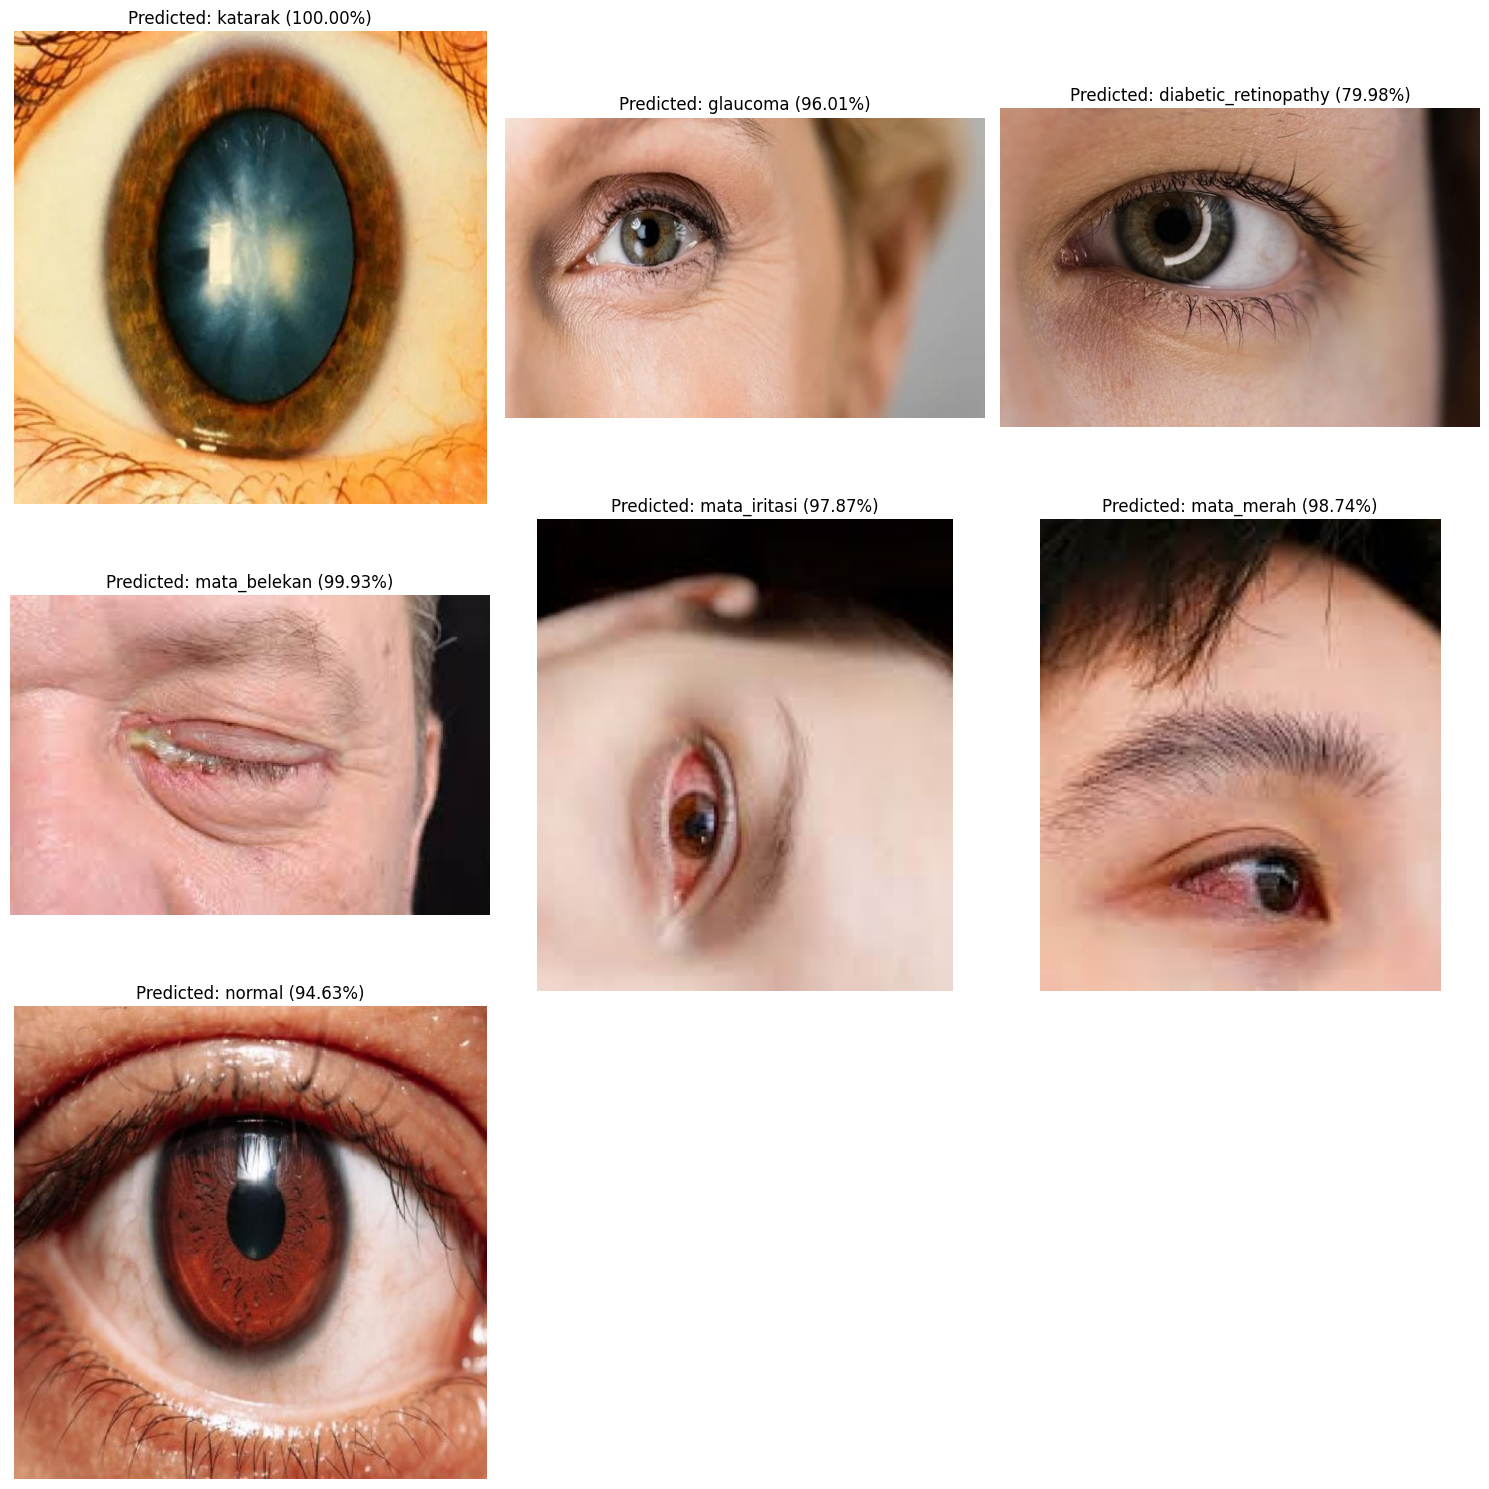

In [ ]:
# Fungsi untuk prediksi gambar
def predict_image(model, image_path, img_size=128):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Gagal membaca gambar dari {image_path}")
        return None, None

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (img_size, img_size))
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)
    predicted_label = CATEGORIES[np.argmax(prediction)]
    confidence = np.max(prediction)

    return predicted_label, confidence

# Fungsi untuk menampilkan prediksi gambar
def display_predictions(model, image_paths, img_size=128):
    n_images = len(image_paths)
    n_cols = 3
    n_rows = (n_images + n_cols - 1) // n_cols

    plt.figure(figsize=(15, 5 * n_rows))

    for i, image_path in enumerate(image_paths):
        predicted_label, confidence = predict_image(model, image_path, img_size)

        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(img)
        plt.title(f'Predicted: {predicted_label} ({confidence * 100:.2f}%)')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Contoh penggunaan
image_paths = [
    '/content/drive/MyDrive/Capstone Project/dataset/katarak/image_35_png.rf.2cecbb90e9888aed24d610a465b89817.jpg',
    '/content/drive/MyDrive/Capstone Project/dataset/glaucoma/20022.webp',
    '/content/drive/MyDrive/Capstone Project/dataset/diabetic_retinopathy/1.jpg',
    '/content/drive/MyDrive/Capstone Project/dataset/mata_belekan/xaqaQ.jpg',
    '/content/drive/MyDrive/Capstone Project/dataset/mata_iritasi/wwww.jpg',
    '/content/drive/MyDrive/Capstone Project/dataset/mata_merah/cwew.jpg',
    '/content/drive/MyDrive/Capstone Project/dataset/normal/1653298613169_png_jpg.rf.5f85cbc0aa0ccae388ffac826a5e5c3c.jpg'
]
display_predictions(model, image_paths)